Epoch 1/50
1/1 [==============================] - 1s 944ms/step - loss: 0.6935
Epoch 2/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6931
Epoch 3/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6927
Epoch 4/50
1/1 [==============================] - 0s 34ms/step - loss: 0.6923
Epoch 5/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6919
Epoch 6/50
1/1 [==============================] - 0s 28ms/step - loss: 0.6915
Epoch 7/50
1/1 [==============================] - 0s 29ms/step - loss: 0.6911
Epoch 8/50
1/1 [==============================] - 0s 27ms/step - loss: 0.6907
Epoch 9/50
1/1 [==============================] - 0s 26ms/step - loss: 0.6903
Epoch 10/50
1/1 [==============================] - 0s 33ms/step - loss: 0.6899
Epoch 11/50
1/1 [==============================] - 0s 36ms/step - loss: 0.6896
Epoch 12/50
1/1 [==============================] - 0s 35ms/step - loss: 0.6892
Epoch 13/50
1/1 [==============================] - 0s 28ms/s

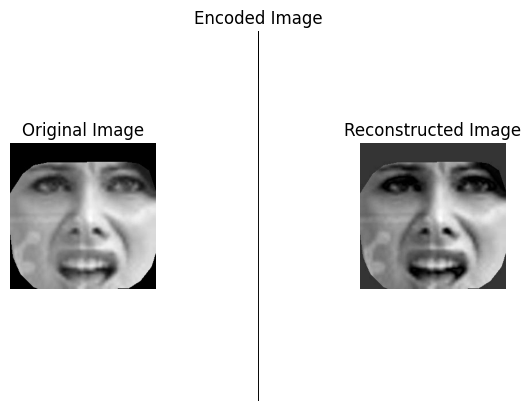

In [65]:
import numpy as np
import cv2
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and preprocess the image data
img_path = "normalized.jpg"
img_width, img_height = 256, 256
num_channels = 1

# Load the image
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Resize the image
img = cv2.resize(img, (img_width, img_height))

# Normalize the pixel values to be between 0 and 1
img = img / 255.0

# Reshape the image to have a single channel
img = img.reshape((img_width, img_height, num_channels))

# Define the encoding and decoding layers
encoding_dim = 32

input_img = Input(shape=(img_width, img_height, num_channels))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(num_channels, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with an appropriate loss function and optimizer
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
x_train = x_test = np.array([img])
num_epochs = 50
batch_size = 1

autoencoder.fit(x_train, x_train,
                epochs=num_epochs,
                batch_size=batch_size,
                shuffle=True)

# Get the encoded representation of the image
encoder = Model(input_img, encoded)
encoded_img = encoder.predict(x_test)

# Get the reconstructed image
decoded_img = autoencoder.predict(x_test)

# Save the reconstructed image

# Display the original, encoded, and reconstructed images
plt.subplot(1, 3, 1)
plt.imshow(x_test[0].reshape(img_width, img_height), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(encoded_img.reshape((-1, encoding_dim)), cmap='gray')
plt.title('Encoded Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(decoded_img[0].reshape(img_width, img_height), cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()

#  save using mpimg
mpimg.imsave('decoded.jpg', decoded_img[0].reshape(img_width, img_height), cmap='gray')
